<a href="https://colab.research.google.com/github/infernoman16/ML-works/blob/main/NLP_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing all the libraries and downloading stopwords from nltk library**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string 
from nltk.corpus import stopwords
import nltk 
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**I read the raw url from my github to load the text data file.**

In [3]:
url='https://raw.githubusercontent.com/infernoman16/learn101/main/train_data.txt?token=AJKWGQKQDLCBXV4VTA37JIS74HHO2'
df=pd.read_csv(url,sep=';',names=['message','label'])

In [4]:
url='https://raw.githubusercontent.com/infernoman16/learn101/main/test_data.txt?token=AJKWGQNN7SE7QKU6A77EBNK74HHR6'
test=pd.read_csv(url,sep=';',names=['message','label'])

**Converted text data to csv format**

In [5]:
df.head()

,message,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [22]:
df.to_csv('train.csv')

In [6]:
test.head()

,message,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [7]:
df['label'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

In [8]:
df.groupby('label').describe()

message                                                               
           count unique                                                top freq
label                                                                          
anger       2159   2159  i made it and enjoyed most of my run but now i...    1
fear        1937   1937  i looked at my husband and even though i love ...    1
joy         5362   5361  i feel more adventurous willing to take risks ...    2
love        1304   1304  i need to go and im feeling a longing inside a...    1
sadness     4666   4666  im feeling quite lonely here now and its only ...    1
surprise     572    572  i know that i will always feel a little bit st...    1

In [9]:
df['length']=df['message'].apply(len)

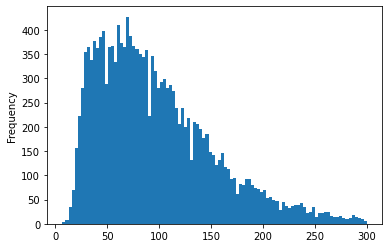

In [10]:
df['length'].plot.hist(bins=100)

**Function for cleaning data and removing punctuation and stopwords and forming tokens**

In [11]:
def txt(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**Creating pipeline for CountVectorizer , Tfidf and our classifier**

In [16]:
pp_final=Pipeline([('bow',CountVectorizer(analyzer=txt)),('tfidf',TfidfTransformer()),('classifier',RandomForestClassifier())])

**I tried training the model with Naive Bias as well but Random Forest gave better results**

In [17]:
pp_final.fit(df['message'],df['label'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function txt at 0x7fa3171a2ae8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokeniz...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                              

**Now we will check our model on the unseen test data**

In [18]:
predict_final=pp_final.predict(test['message'])

 **Our model does really well on the test data with accuracy of 89%**

In [19]:
print(classification_report(test['label'],predict_final))

              precision    recall  f1-score   support

       anger       0.90      0.89      0.89       275
        fear       0.87      0.89      0.88       224
         joy       0.88      0.93      0.90       695
        love       0.78      0.71      0.75       159
     sadness       0.94      0.92      0.93       581
    surprise       0.66      0.56      0.61        66

    accuracy                           0.89      2000
   macro avg       0.84      0.82      0.83      2000
weighted avg       0.88      0.89      0.88      2000



In [20]:
test['predictions']=predict_final

**We can see how our predictions are so accurate with supervised label**

In [21]:
test.head(25)

,message,label,predictions
0,im feeling rather rotten so im not very ambiti...,sadness,sadness
1,im updating my blog because i feel shitty,sadness,sadness
2,i never make her separate from me because i do...,sadness,sadness
3,i left with my bouquet of red and yellow tulip...,joy,joy
4,i was feeling a little vain when i did this one,sadness,sadness
5,i cant walk into a shop anywhere where i do no...,fear,fear
6,i felt anger when at the end of a telephone call,anger,anger
7,i explain why i clung to a relationship with a...,joy,joy
8,i like to have the same breathless feeling as ...,joy,joy
9,i jest i feel grumpy tired and pre menstrual w...,anger,anger
